In [1]:
#libraries and dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7, 7]
import seaborn as sns
from random import random 
from sklearn.cluster import KMeans

champs2 = pd.read_csv("../Datasets/2/champs.csv")
participants=pd.read_csv("../Datasets/2/participants.csv")

champs5= pd.read_csv("../Datasets/5/LoL-Champions.csv")
teambans=pd.read_csv("../Datasets/2/teambans.csv")
stats=pd.read_csv("../Datasets/2/stats1.csv")

In [2]:
# ŞAMPİYONLAR
print(champs2.id.count(), "\nhero in champs2 ds")
champs2.head()

138 
hero in champs2 ds


,name,id
0,Jax,24
1,Sona,37
2,Tristana,18
3,Varus,110
4,Fiora,114


In [3]:
stats.head()

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,9,0,3748,2003,3111,3053,1419,1042,3340,6,...,69,42,27,610,13,0,0,10,0,0
1,10,0,2301,3111,3190,3107,0,0,3364,0,...,1,1,0,211,14,1,0,17,3,0
2,11,0,1055,3072,3006,3031,3046,1036,3340,7,...,3,1,2,182,14,1,0,13,5,0
3,12,0,1029,3078,3156,1001,3053,0,3340,5,...,6,6,0,106,15,0,0,3,0,0
4,13,0,3020,1058,3198,3102,1052,1026,3340,2,...,4,3,1,159,15,0,0,10,0,0


In [4]:
participants.head()

,id,matchid,player,championid,ss1,ss2,role,position
0,9,10,1,19,4,11,NONE,JUNGLE
1,10,10,2,267,3,4,DUO_SUPPORT,BOT
2,11,10,3,119,7,4,DUO_CARRY,BOT
3,12,10,4,114,12,4,SOLO,TOP
4,13,10,5,112,4,3,SOLO,MID


In [5]:
# CHAMPS2DEKİ BOŞ SATIRLAR KONTROLÜ
champs2.isnull().sum()

name    0
id      0
dtype: int64

In [6]:
# CHAMPS5DEN GELEN ŞAMPİYONLAR
print(champs5)
champs5=champs5.loc[:,"Id":"Class"]
champs5.head()

      Id     Name    Class  Style  Difficulty DamageType  Damage  Sturdiness  \
0      1   Aatrox  Warrior      3           2          P       3           3   
1      2     Ahri     Mage     10           2          M       3           1   
2      3    Akali  Assasin      7           2         PM       3           1   
3      4  Alistar  Support      7           1          M       1           3   
4      5    Amumu     Tank      9           1          M       2           3   
..   ...      ...      ...    ...         ...        ...     ...         ...   
140  141      Zed  Assasin      6           3          P       3           1   
141  142    Ziggs     Mage      9           2          M       3           1   
142  143   Zilean  Support     10           2          M       2           1   
143  144      Zoe     Mage     10           3          M       3           1   
144  145     Zyra  Support     10           2          M       3           1   

     Crowd-Control  Mobility  Functiona

,Id,Name,Class
0,1,Aatrox,Warrior
1,2,Ahri,Mage
2,3,Akali,Assasin
3,4,Alistar,Support
4,5,Amumu,Tank


In [7]:
# CHAMPS5DEKİ BOŞ SATIRLAR KONTROLÜ
champs5.isnull().sum()

Id       0
Name     0
Class    0
dtype: int64

In [8]:
# İSİMLER İLE CHAMPS2 VE CHAMPS5İ BİRLEŞTİRME
print("merged ds full join")
champs = pd.merge(champs2,champs5,how="outer",left_on="name",right_on="Name").drop("Id", axis=1)

print(champs[champs["name"].isnull()])
print("-----------------------------------------")
print(champs[champs["Name"].isnull()])

print("\n\n-----------left join-------------------\n\n")

print("merged ds left join")
champs = pd.merge(champs2,champs5,how="left",left_on="name",right_on="Name").drop("Id", axis=1)
print(champs[champs["name"].isnull()])
print("-----------------------------------------")
print(champs[champs["Name"].isnull()])
print(champs.count())
champs.head()

merged ds full join
    name  id    Name     Class
138  NaN NaN  Kai Sa  Marksman
139  NaN NaN   Neeko      Mage
140  NaN NaN    Pyke   Support
141  NaN NaN  Qiyana   Warrior
142  NaN NaN   Sylas   Warrior
143  NaN NaN   Yuumi   Support
144  NaN NaN     Zoe      Mage
-----------------------------------------
Empty DataFrame
Columns: [name, id, Name, Class]
Index: []


-----------left join-------------------


merged ds left join
Empty DataFrame
Columns: [name, id, Name, Class]
Index: []
-----------------------------------------
Empty DataFrame
Columns: [name, id, Name, Class]
Index: []
name     138
id       138
Name     138
Class    138
dtype: int64


,name,id,Name,Class
0,Jax,24,Jax,Warrior
1,Sona,37,Sona,Support
2,Tristana,18,Tristana,Marksman
3,Varus,110,Varus,Marksman
4,Fiora,114,Fiora,Warrior


In [9]:
# KARAKTERLERİN OYUN TİPLERİ CHAMPS'E SÜTUN OLARAK EKLENDİ
GameStyle = []
for iter in champs["Class"]:

    if (iter == "Mage" or iter == "Marksman" or iter == "Assasin" or iter == "Warrior"):
        GameStyle.append("Aggressive")
    else:
        GameStyle.append("Supportive")
champs["GameStyle"]=GameStyle
print(champs)

          name   id       Name     Class   GameStyle
0          Jax   24        Jax   Warrior  Aggressive
1         Sona   37       Sona   Support  Supportive
2     Tristana   18   Tristana  Marksman  Aggressive
3        Varus  110      Varus  Marksman  Aggressive
4        Fiora  114      Fiora   Warrior  Aggressive
..         ...  ...        ...       ...         ...
133       Shen   98       Shen      Tank  Supportive
134  Jarvan IV   59  Jarvan IV   Warrior  Aggressive
135   Malzahar   90   Malzahar      Mage  Aggressive
136        Zac  154        Zac   Warrior  Aggressive
137     Gragas   79     Gragas   Warrior  Aggressive

[138 rows x 5 columns]


In [10]:
# MAÇLARDAKİ ŞAMPİYON IDYE GÖRE ŞAMPİYON ÖZELLİKLERİNİ LİSTELEME
participants= pd.merge(participants,champs,how="left",left_on="championid",right_on="id")

print(participants.isnull().count())
participants.head(10)

id_x          1834520
matchid       1834520
player        1834520
championid    1834520
ss1           1834520
ss2           1834520
role          1834520
position      1834520
name          1834520
id_y          1834520
Name          1834520
Class         1834520
GameStyle     1834520
dtype: int64


,id_x,matchid,player,championid,ss1,ss2,role,position,name,id_y,Name,Class,GameStyle
0,9,10,1,19,4,11,NONE,JUNGLE,Warwick,19,Warwick,Warrior,Aggressive
1,10,10,2,267,3,4,DUO_SUPPORT,BOT,Nami,267,Nami,Support,Supportive
2,11,10,3,119,7,4,DUO_CARRY,BOT,Draven,119,Draven,Marksman,Aggressive
3,12,10,4,114,12,4,SOLO,TOP,Fiora,114,Fiora,Warrior,Aggressive
4,13,10,5,112,4,3,SOLO,MID,Viktor,112,Viktor,Mage,Aggressive
5,14,10,6,72,11,4,NONE,JUNGLE,Skarner,72,Skarner,Warrior,Aggressive
6,15,10,7,3,4,12,SOLO,TOP,Galio,3,Galio,Mage,Aggressive
7,16,10,8,103,14,4,SOLO,MID,Ahri,103,Ahri,Mage,Aggressive
8,17,10,9,222,7,4,DUO_CARRY,BOT,Jinx,222,Jinx,Marksman,Aggressive
9,18,10,10,161,14,4,DUO_SUPPORT,BOT,VelKoz,161,VelKoz,Mage,Aggressive


In [11]:
# ŞAMPİYON IDYE GÖRE MAÇLARDA EN ÇOK SEÇİLEN KARAKTERLER
print(participants.championid.count())
print(participants.championid.value_counts())

1834520
64     59286
51     57275
236    56676
412    48877
103    37424
       ...  
136     2231
72      2111
82      2107
421     2106
6       1021
Name: championid, Length: 136, dtype: int64


In [12]:
# ŞAMPİYON İSMİNE GÖRE MAÇLARDA EN ÇOK SEÇİLEN KARAKTERLER
print(participants.Name.count())
print(participants.Name.value_counts())

1834520
Lee Sin         59286
Caitlyn         57275
Lucian          56676
Thresh          48877
Ahri            37424
                ...  
Aurelion Sol     2231
Skarner          2111
Mordekaiser      2107
RekSai           2106
Urgot            1021
Name: Name, Length: 136, dtype: int64


In [13]:
# AGGRESSIVE VE SUPPORTIVE HEROLARIN MAÇLARDA SEÇİLME SAYILARI
print(participants.GameStyle.count())
print(participants.GameStyle.value_counts())

1834520
Aggressive    1432911
Supportive     401609
Name: GameStyle, dtype: int64


1432911
401609


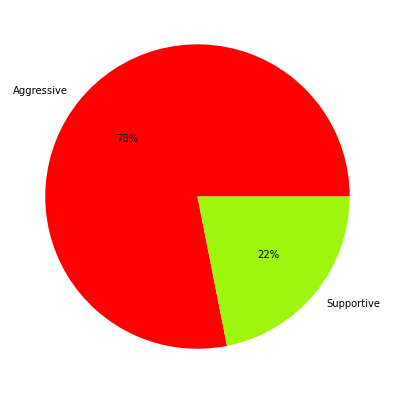

In [14]:
# 1800000 MAÇTA SEÇİLEN KARAKTERLERİN AGRO / SUP OLDUĞUNUN PİECHARTI
labels="Aggressive", "Supportive"
class1=participants[participants["GameStyle"]=="Aggressive"].count()[1]
class2=participants[participants["GameStyle"]=="Supportive"].count()[1]
print(class1)
print(class2)
colors=["red","#9EF50E"]
my_data=[class1,class2]
plt.pie(my_data,labels=labels,autopct='%2.f%%',colors=colors)
plt.show()

In [15]:
# BANLANAN DATALARI VE NULL VAR MI KONTROLÜ
print(teambans.count())
print(teambans.isnull().count())
teambans.head()

matchid       1099185
teamid        1099185
championid    1099185
banturn       1099185
dtype: int64
matchid       1099185
teamid        1099185
championid    1099185
banturn       1099185
dtype: int64


,matchid,teamid,championid,banturn
0,10,100,11,1
1,10,100,117,3
2,10,100,120,5
3,10,200,84,2
4,10,200,201,4


In [16]:
# BANLANANLAR TABLOSUYLA CHAMPS İ BİRLEŞTİRİYORUZ
teambans= pd.merge(teambans,champs,how="left",left_on="championid",right_on="id")
print(teambans.isnull().count())
teambans.head()

matchid       1099185
teamid        1099185
championid    1099185
banturn       1099185
name          1099185
id            1099185
Name          1099185
Class         1099185
GameStyle     1099185
dtype: int64


,matchid,teamid,championid,banturn,name,id,Name,Class,GameStyle
0,10,100,11,1,Master Yi,11,Master Yi,Assasin,Aggressive
1,10,100,117,3,Lulu,117,Lulu,Support,Supportive
2,10,100,120,5,Hecarim,120,Hecarim,Warrior,Aggressive
3,10,200,84,2,Akali,84,Akali,Assasin,Aggressive
4,10,200,201,4,Braum,201,Braum,Support,Supportive


898795
200390


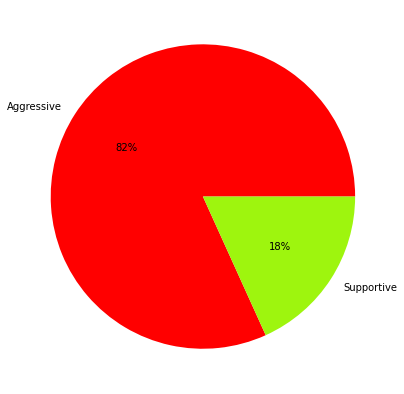

In [17]:
# 1000000 MAÇTA banlanan KARAKTERLERİN AGRO / SUP OLDUĞUNUN PİECHARTI
labels="Aggressive", "Supportive"
class1=teambans[teambans["GameStyle"]=="Aggressive"].count()[1]
class2=teambans[teambans["GameStyle"]=="Supportive"].count()[1]
colors=["red","#9EF50E"]
print(class1)
print(class2)
my_data=[class1,class2]
plt.pie(my_data,labels=labels,autopct='%2.f%%',colors=colors)
plt.show()

In [18]:
# İSME GÖRE EN ÇOK BANLANAN KARAKTERLER
print(teambans.Name.count())
print(teambans.Name.value_counts())

1099185
Yasuo      97862
Fizz       81525
Xayah      77293
Lulu       75421
Darius     58799
           ...  
Sion         221
Nami         161
Corki        156
Karthus      122
Sivir         78
Name: Name, Length: 136, dtype: int64


In [19]:
# İSME GÖRE EN ÇOK SEÇİLEN 10 KARAKTER
participants.Name.value_counts().head(10)

Lee Sin    59286
Caitlyn    57275
Lucian     56676
Thresh     48877
Ahri       37424
Vayne      35014
Yasuo      30257
Xayah      28944
Orianna    28594
Ezreal     28397
Name: Name, dtype: int64

In [20]:
# İSME GÖRE EN ÇOK SEÇİLEN 10 KARAKTERİ AYRI ARRAYLERE ATMACA
bantop=[]
labelbantop=[]
choosetop=[]
labelchoosetop=[]
print(participants.Name.value_counts().head(10).sum())
for iter in range(10):
    labelchoosetop.append(participants.Name.value_counts().head(10).index[iter])
    choosetop.append(participants.Name.value_counts().head(10)[iter])
print(labelchoosetop)
print(choosetop)

410744
['Lee Sin', 'Caitlyn', 'Lucian', 'Thresh', 'Ahri', 'Vayne', 'Yasuo', 'Xayah', 'Orianna', 'Ezreal']
[59286, 57275, 56676, 48877, 37424, 35014, 30257, 28944, 28594, 28397]


In [21]:
# İSME GÖRE EN ÇOK BANLANAN 10 KARAKTERİ AYRI ARRAYLERE ATMACA
print(teambans.Name.value_counts().head(10))
for iter in range(10):
    labelbantop.append(teambans.Name.value_counts().head(10).index[iter])
    bantop.append(teambans.Name.value_counts().head(10)[iter])
print(labelbantop)
print(bantop)

Yasuo       97862
Fizz        81525
Xayah       77293
Lulu        75421
Darius      58799
Sejuani     47063
Zed         41395
Katarina    39800
Fiora       36246
Ivern       30356
Name: Name, dtype: int64
['Yasuo', 'Fizz', 'Xayah', 'Lulu', 'Darius', 'Sejuani', 'Zed', 'Katarina', 'Fiora', 'Ivern']
[97862, 81525, 77293, 75421, 58799, 47063, 41395, 39800, 36246, 30356]


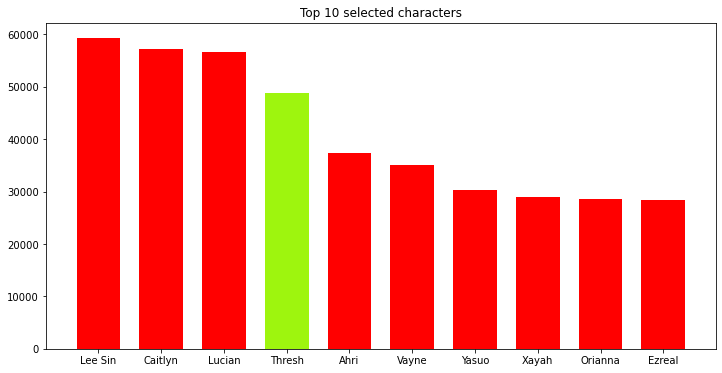

In [22]:
# TOP 10 SEÇİLENLER BARCHART
plt.figure(figsize=(12, 6))
plt.title('Top 10 selected characters')
plt.bar(labelchoosetop, choosetop, width=0.7,
color=['red', 'red', 'red', '#9EF50E', 'red', 'red', 'red', 'red', 'red', 'red'])
plt.show()

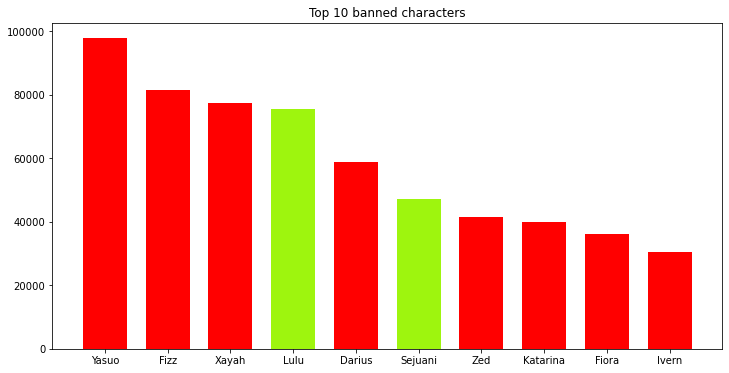

In [23]:
# TOP 10 BANLANANLAR BARCHART
plt.figure(figsize = (12,6))
plt.title('Top 10 banned characters')
plt.bar(labelbantop,bantop,width=0.7,color=['red', 'red', 'red', '#9EF50E', 'red', '#9EF50E', 'red', 'red', 'red', 'red'])
plt.show()


In [24]:
df_stats=stats[["id","kills","deaths","assists"]]
df_stats.head()

,id,kills,deaths,assists
0,9,6,10,1
1,10,0,2,12
2,11,7,8,5
3,12,5,11,2
4,13,2,8,2


In [25]:
def kMeans(n):
    centers = randomPartion(n)
    for iter in range(12):
        for index,row in df_stats.iterrows():
            distances=[]
            for i in range(n):
                distances.append(euclidianDistance(row["assists"],row["kills"],centers[0][i],centers[1][i]))

            df_stats.at[index,"tempClass"]=distances.index(min(distances))

        for i in range(n):
            x = list(df_stats["assists"][df_stats["tempClass"]==i])
            y = list(df_stats["kills"][df_stats["tempClass"]==i])
            plt.scatter(x, y)
        print(centers)
        old=centers.copy()
        centers=calculateNewCenters(n,centers)
        
        xs = centers[0]
        ys = centers[1]
        
        ax_1=sns.scatterplot(data=df_stats, x="assists", y="kills", hue="tempClass",s=60)
        ax_2=plt.scatter(xs, ys,color="green",marker='^',s=100)
        plt.show()
        
        if (np.absolute(old[0][0]-centers[0][0])<0.0001) and (np.absolute(old[1][0]-centers[1][0])<0.0001) :
            print(iter+1)
            break;
            
    return centers

def calculateNewCenters(n, oldCenters):   
    meanAssist=[]
    meanKill=[]
    for i in range(n):
        x=df_stats["assists"][df_stats["tempClass"]==i]
        y=df_stats["kills"][df_stats["tempClass"]==i]
        if x.count()==0:
            meanAssist.append(oldCenters[0][i])
            meanKill.append(oldCenters[1][i])
            continue
            
        meanAssist.append(x.sum()/x.count())
        meanKill.append(y.sum()/y.count())
        
    return [meanAssist,meanKill]

def euclidianDistance(x1,y1,x2,y2):
    disX=np.absolute(x1-x2)
    disY=np.absolute(y1-y2)
    return np.sqrt(disX*disX+disY*disY)

def randomPartion( n ):
    xs=[]
    ys=[]
    x=df_stats["assists"].mean()
    y=df_stats["kills"].mean()
    for i in range(n):
        xs.append(x+np.random.rand()*4)
        ys.append(y+np.random.rand()*4)
    return [xs,ys]

In [26]:
#lastCenters=kMeans(4)

In [ ]:
x = df_stats.iloc[:, [1, 2]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = '0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = '1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = '2')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'blue', label = '3')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'black', label = '4')

# dağılımdaki kümelerdeki eleman sayıları, buradan agresif/supportive/iyi kötü/bencil olup olmadığı gibi sonuçlar çıkacak.
print(len(x[y_kmeans == 0, 0]))
print(len(x[y_kmeans == 1, 0]))
print(len(x[y_kmeans == 2, 0]))
print(len(x[y_kmeans == 3, 0]))
print(len(x[y_kmeans == 4, 0]))

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', marker='^', label = 'Centroids')

plt.legend()